# **ADATHALMAZ ELŐKÉSZÍTÉS**

---



Kezdetben készítettem scrapet különböző oldalaktól és kiválaszottam azt, ahol a legtöbb olyan rekord volt, amiben helyes adatok szerepelnek. Helyes adatnak vettem azt, ha a sorban nem volt olyan attribútum, ami nem tartalmaz értéket vagy az érték helytelen értéket vett fel(például, ha a labdabirtoklás összértéke nem 100% vagy ha a BET365 adatok által kiadott eseménytér túlságon eltér egy teljes eseménytértől).

In [ ]:
import numpy as np
import os
import tensorflow as tf
assert tf.__version__.startswith('2')

In [ ]:
'''physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)'''

'physical_devices = tf.config.experimental.list_physical_devices(\'GPU\')\nprint("Num GPUs Available: ", len(physical_devices))\ntf.config.experimental.set_memory_growth(physical_devices[0], True)'

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/aszakdoga/data/dataset4.csv')

In [ ]:
data.head()

,web-scraper-order,web-scraper-start-url,season2020,season2020-href,extract_matches,extract_matches-href,matches,matches-href,hometeamname,guestteamname,stats,stats-href,homepossession,guestpossession,season2019,season2019-href,season2018,season2018-href,season2017,season2017-href,season2016,season2016-href,season2015,season2015-href,season2014,season2014-href,season2013,season2013-href,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,homeoffsides,guestoffsides,date,betlink,betlink-href,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin
0,1633055562-7683,https://www.soccer24.com/spain/laliga/archive/,NaN,NaN,Show more matches,https://www.soccer24.com/spain/laliga-2016-201...,03.12. 20:45Atl. MadridEspanyol0 - 0(0 - 0),https://www.soccer24.com/match/M1wuiIiQ/#match...,Atl. Madrid,Espanyol,Statistics,https://www.soccer24.com/match/M1wuiIiQ/#match...,67%,33%,NaN,NaN,NaN,NaN,NaN,NaN,LaLiga 2016/2017,https://www.soccer24.com/spain/laliga-2016-2017/,NaN,NaN,NaN,NaN,NaN,NaN,0,0,11,6,3,3,3,2,5,1,18,14,9,2,67%,33%,03.12.2016 20:45,Odds,https://www.soccer24.com/match/M1wuiIiQ/#odds-...,1.25,5.75,13.00,3,3
1,1633048920-7103,https://www.soccer24.com/spain/laliga/archive/,NaN,NaN,Show more matches,https://www.soccer24.com/spain/laliga-2014-201...,18.04. 20:00Real MadridMalaga3 - 1(1 - 0),https://www.soccer24.com/match/bZr5uKQD/#match...,Real Madrid,Malaga,Statistics,https://www.soccer24.com/match/bZr5uKQD/#match...,65%,35%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primera Division 2014/2015,https://www.soccer24.com/spain/laliga-2014-2015/,NaN,NaN,3,1,12,11,6,2,6,7,0,2,23,15,4,3,65%,35%,18.04.2015 20:00,Odds,https://www.soccer24.com/match/bZr5uKQD/#odds-...,1.17,8.00,15.00,7,27
2,1633049064-7125,https://www.soccer24.com/spain/laliga/archive/,NaN,NaN,Show more matches,https://www.soccer24.com/spain/laliga-2014-201...,29.04. 20:00Celta VigoMalaga1 - 0(0 - 0),https://www.soccer24.com/match/6Z2M4zfP/#match...,Celta Vigo,Malaga,Statistics,https://www.soccer24.com/match/6Z2M4zfP/#match...,61%,39%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primera Division 2014/2015,https://www.soccer24.com/spain/laliga-2014-2015/,NaN,NaN,1,0,14,7,2,2,10,4,2,1,16,8,3,5,61%,39%,29.04.2015 20:00,Odds,https://www.soccer24.com/match/6Z2M4zfP/#odds-...,1.67,3.90,5.25,22,20
3,1633045806-6628,https://www.soccer24.com/spain/laliga/archive/,NaN,NaN,Show more matches,https://www.soccer24.com/spain/laliga-2013-201...,02.02. 21:00Ath BilbaoReal Madrid1 - 1(0 - 0),https://www.soccer24.com/match/fX2hW5hg/#match...,Ath Bilbao,Real Madrid,Statistics,https://www.soccer24.com/match/fX2hW5hg/#match...,58%,42%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primera Division 2013/2014,https://www.soccer24.com/spain/laliga-2013-2014/,1,1,9,10,3,3,4,6,2,1,16,12,6,3,58%,42%,02.02.2014 21:00,Odds,https://www.soccer24.com/match/fX2hW5hg/#odds-...,4.75,4.20,1.62,15,17
4,1633053113-7525,https://www.soccer24.com/spain/laliga/archive/,NaN,NaN,Show more matches,https://www.soccer24.com/spain/laliga-2015-201...,01.05. 12:00Ath BilbaoCelta Vigo2 - 1(1 - 1),https://www.soccer24.com/match/xSSjHD9t/#match...,Ath Bilbao,Celta Vigo,Statistics,https://www.soccer24.com/match/xSSjHD9t/#match...,57%,43%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primera Division 2015/2016,https://www.soccer24.com/spain/laliga-2015-2016/,NaN,NaN,NaN,NaN,2,1,10,5,2,2,5,3,3,0,25,12,7,2,57%,43%,01.05.2016 12:00,Odds,https://www.soccer24.com/match/xSSjHD9t/#odds-...,1.83,3.50,4.33,1,0


A futtatókörnyezet után a scrapeből hátramaradt linkeket tartalmazó sorokat kitöröltem

In [ ]:
list(data.columns)

['web-scraper-order',
 'web-scraper-start-url',
 'season2020',
 'season2020-href',
 'extract_matches',
 'extract_matches-href',
 'matches',
 'matches-href',
 'hometeamname',
 'guestteamname',
 'stats',
 'stats-href',
 'homepossession',
 'guestpossession',
 'season2019',
 'season2019-href',
 'season2018',
 'season2018-href',
 'season2017',
 'season2017-href',
 'season2016',
 'season2016-href',
 'season2015',
 'season2015-href',
 'season2014',
 'season2014-href',
 'season2013',
 'season2013-href',
 'homegoals',
 'guestgoals',
 'homegoalattempts',
 'guestgoalattempts',
 'homeshotsongoal',
 'guestshotsongoal',
 'homeshotsoffgoal',
 'guestshotsoffgoal',
 'homeblockedshots',
 'guestblockedshots',
 'homefreekicks',
 'guestfreekicks',
 'homecornerkicks',
 'guestcornerkicks',
 'homeoffsides',
 'guestoffsides',
 'date',
 'betlink',
 'betlink-href',
 'bethomewinodds',
 'betdrawodds',
 'betguestwinodds',
 'homethrowin',
 'guestthrowin']

In [ ]:
data.isnull().sum()

web-scraper-order           0
web-scraper-start-url       0
season2020               2660
season2020-href          2660
extract_matches             0
extract_matches-href        0
matches                     0
matches-href                0
hometeamname                0
guestteamname               0
stats                       0
stats-href                  0
homepossession              0
guestpossession             0
season2019               2660
season2019-href          2660
season2018               2660
season2018-href          2660
season2017               2660
season2017-href          2660
season2016               2660
season2016-href          2660
season2015               2660
season2015-href          2660
season2014               2660
season2014-href          2660
season2013               2660
season2013-href          2660
homegoals                   0
guestgoals                  0
homegoalattempts            0
guestgoalattempts           0
homeshotsongoal             0
guestshots

**Felesleges oszlopok kiszedése**

---


Továbbá eldobtam az összes üres mezőt tartalmazó sort(talán 1 meccset veszítettem ezzel)

In [ ]:
data = data.drop(['web-scraper-order', 'web-scraper-start-url', 'extract_matches','extract_matches-href','matches-href','stats-href','stats','betlink','betlink-href' ],
          axis='columns')

In [ ]:
data.shape

(3040, 43)

In [ ]:
data = data.dropna(thresh=400 , axis='columns')

In [ ]:
data.shape

(3040, 27)

In [ ]:
data.isnull().sum()

matches              0
hometeamname         0
guestteamname        0
homepossession       0
guestpossession      0
homegoals            0
guestgoals           0
homegoalattempts     0
guestgoalattempts    0
homeshotsongoal      0
guestshotsongoal     0
homeshotsoffgoal     0
guestshotsoffgoal    0
homeblockedshots     0
guestblockedshots    0
homefreekicks        0
guestfreekicks       0
homecornerkicks      0
guestcornerkicks     0
homeoffsides         0
guestoffsides        0
date                 0
bethomewinodds       0
betdrawodds          0
betguestwinodds      0
homethrowin          0
guestthrowin         0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(3040, 27)

In [ ]:
data.isnull().sum()

matches              0
hometeamname         0
guestteamname        0
homepossession       0
guestpossession      0
homegoals            0
guestgoals           0
homegoalattempts     0
guestgoalattempts    0
homeshotsongoal      0
guestshotsongoal     0
homeshotsoffgoal     0
guestshotsoffgoal    0
homeblockedshots     0
guestblockedshots    0
homefreekicks        0
guestfreekicks       0
homecornerkicks      0
guestcornerkicks     0
homeoffsides         0
guestoffsides        0
date                 0
bethomewinodds       0
betdrawodds          0
betguestwinodds      0
homethrowin          0
guestthrowin         0
dtype: int64

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(3040, 27)

Meggyőződtem, hogy a statisztikák valós tartományok között mozognak

In [ ]:
useful = data[
     (1 / data['bethomewinodds'] + 1 / data['betguestwinodds'] + 1 / data['betdrawodds'] >0.7) &
     (1 / data['bethomewinodds'] + 1 / data['betguestwinodds'] + 1 / data['betdrawodds'] < 1.1)
]

In [ ]:
useful.to_numpy

<bound method DataFrame.to_numpy of                                             matches  ... guestthrowin
0       03.12. 20:45Atl. MadridEspanyol0 - 0(0 - 0)  ...            3
1         18.04. 20:00Real MadridMalaga3 - 1(1 - 0)  ...           27
2          29.04. 20:00Celta VigoMalaga1 - 0(0 - 0)  ...           20
3     02.02. 21:00Ath BilbaoReal Madrid1 - 1(0 - 0)  ...           17
4      01.05. 12:00Ath BilbaoCelta Vigo2 - 1(1 - 1)  ...            0
...                                             ...  ...          ...
3035  22.11. 16:15Cadiz CFReal Sociedad0 - 1(0 - 0)  ...            0
3036     18.05. 16:15ValladolidValencia0 - 2(0 - 1)  ...            4
3037  21.02. 20:30Atl. MadridVillarreal0 - 0(0 - 0)  ...            3
3038            20.06. 19:30GetafeEibar1 - 1(1 - 1)  ...            1
3039         03.05. 21:00SevillaLeganes0 - 3(0 - 2)  ...            3

[3039 rows x 27 columns]>

In [ ]:
useful.head()

,matches,hometeamname,guestteamname,homepossession,guestpossession,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,homeoffsides,guestoffsides,date,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin
0,03.12. 20:45Atl. MadridEspanyol0 - 0(0 - 0),Atl. Madrid,Espanyol,67%,33%,0,0,11,6,3,3,3,2,5,1,18,14,9,2,67%,33%,03.12.2016 20:45,1.25,5.75,13.00,3,3
1,18.04. 20:00Real MadridMalaga3 - 1(1 - 0),Real Madrid,Malaga,65%,35%,3,1,12,11,6,2,6,7,0,2,23,15,4,3,65%,35%,18.04.2015 20:00,1.17,8.00,15.00,7,27
2,29.04. 20:00Celta VigoMalaga1 - 0(0 - 0),Celta Vigo,Malaga,61%,39%,1,0,14,7,2,2,10,4,2,1,16,8,3,5,61%,39%,29.04.2015 20:00,1.67,3.90,5.25,22,20
3,02.02. 21:00Ath BilbaoReal Madrid1 - 1(0 - 0),Ath Bilbao,Real Madrid,58%,42%,1,1,9,10,3,3,4,6,2,1,16,12,6,3,58%,42%,02.02.2014 21:00,4.75,4.20,1.62,15,17
4,01.05. 12:00Ath BilbaoCelta Vigo2 - 1(1 - 1),Ath Bilbao,Celta Vigo,57%,43%,2,1,10,5,2,2,5,3,3,0,25,12,7,2,57%,43%,01.05.2016 12:00,1.83,3.50,4.33,1,0


In [ ]:
useful.shape

(3039, 27)

In [ ]:
df = useful
df.head(5)

,matches,hometeamname,guestteamname,homepossession,guestpossession,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,homeoffsides,guestoffsides,date,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin
0,03.12. 20:45Atl. MadridEspanyol0 - 0(0 - 0),Atl. Madrid,Espanyol,67%,33%,0,0,11,6,3,3,3,2,5,1,18,14,9,2,67%,33%,03.12.2016 20:45,1.25,5.75,13.00,3,3
1,18.04. 20:00Real MadridMalaga3 - 1(1 - 0),Real Madrid,Malaga,65%,35%,3,1,12,11,6,2,6,7,0,2,23,15,4,3,65%,35%,18.04.2015 20:00,1.17,8.00,15.00,7,27
2,29.04. 20:00Celta VigoMalaga1 - 0(0 - 0),Celta Vigo,Malaga,61%,39%,1,0,14,7,2,2,10,4,2,1,16,8,3,5,61%,39%,29.04.2015 20:00,1.67,3.90,5.25,22,20
3,02.02. 21:00Ath BilbaoReal Madrid1 - 1(0 - 0),Ath Bilbao,Real Madrid,58%,42%,1,1,9,10,3,3,4,6,2,1,16,12,6,3,58%,42%,02.02.2014 21:00,4.75,4.20,1.62,15,17
4,01.05. 12:00Ath BilbaoCelta Vigo2 - 1(1 - 1),Ath Bilbao,Celta Vigo,57%,43%,2,1,10,5,2,2,5,3,3,0,25,12,7,2,57%,43%,01.05.2016 12:00,1.83,3.50,4.33,1,0


# **+ OSZLOPOK HOZZÁADÁSA**

---





Az adathalmaz nem tartalmazott pár alapvető értéket, ami kikövetkeztethető az adatokból, mint például a gólkülönbség vagy a ki a győztes csapat.

In [ ]:
df = df.assign(GoalDiff=lambda x: x.homegoals - x.guestgoals)
#Ha a győztes a hazai, az érték 1 lesz
#Ha a győztes a vendég, az érték -1 lesz
#Ha döntetlen, az érték 0 lesz
conditions = [
    (df['GoalDiff'] > 0),
    (df['GoalDiff'] == 0),
    (df['GoalDiff'] < 0)
    ]
values = [1,0,-1]
df['winner'] = np.select(conditions, values)
df.head(5)

,matches,hometeamname,guestteamname,homepossession,guestpossession,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,homeoffsides,guestoffsides,date,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin,GoalDiff,winner
0,03.12. 20:45Atl. MadridEspanyol0 - 0(0 - 0),Atl. Madrid,Espanyol,67%,33%,0,0,11,6,3,3,3,2,5,1,18,14,9,2,67%,33%,03.12.2016 20:45,1.25,5.75,13.00,3,3,0,0
1,18.04. 20:00Real MadridMalaga3 - 1(1 - 0),Real Madrid,Malaga,65%,35%,3,1,12,11,6,2,6,7,0,2,23,15,4,3,65%,35%,18.04.2015 20:00,1.17,8.00,15.00,7,27,2,1
2,29.04. 20:00Celta VigoMalaga1 - 0(0 - 0),Celta Vigo,Malaga,61%,39%,1,0,14,7,2,2,10,4,2,1,16,8,3,5,61%,39%,29.04.2015 20:00,1.67,3.90,5.25,22,20,1,1
3,02.02. 21:00Ath BilbaoReal Madrid1 - 1(0 - 0),Ath Bilbao,Real Madrid,58%,42%,1,1,9,10,3,3,4,6,2,1,16,12,6,3,58%,42%,02.02.2014 21:00,4.75,4.20,1.62,15,17,0,0
4,01.05. 12:00Ath BilbaoCelta Vigo2 - 1(1 - 1),Ath Bilbao,Celta Vigo,57%,43%,2,1,10,5,2,2,5,3,3,0,25,12,7,2,57%,43%,01.05.2016 12:00,1.83,3.50,4.33,1,0,1,1


In [ ]:
#hibás értékek eltávolítása
df.drop('homeoffsides', axis='columns', inplace=True)
df.drop('guestoffsides', axis='columns', inplace=True)
df.head(5)

,matches,hometeamname,guestteamname,homepossession,guestpossession,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,date,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin,GoalDiff,winner
0,03.12. 20:45Atl. MadridEspanyol0 - 0(0 - 0),Atl. Madrid,Espanyol,67%,33%,0,0,11,6,3,3,3,2,5,1,18,14,9,2,03.12.2016 20:45,1.25,5.75,13.00,3,3,0,0
1,18.04. 20:00Real MadridMalaga3 - 1(1 - 0),Real Madrid,Malaga,65%,35%,3,1,12,11,6,2,6,7,0,2,23,15,4,3,18.04.2015 20:00,1.17,8.00,15.00,7,27,2,1
2,29.04. 20:00Celta VigoMalaga1 - 0(0 - 0),Celta Vigo,Malaga,61%,39%,1,0,14,7,2,2,10,4,2,1,16,8,3,5,29.04.2015 20:00,1.67,3.90,5.25,22,20,1,1
3,02.02. 21:00Ath BilbaoReal Madrid1 - 1(0 - 0),Ath Bilbao,Real Madrid,58%,42%,1,1,9,10,3,3,4,6,2,1,16,12,6,3,02.02.2014 21:00,4.75,4.20,1.62,15,17,0,0
4,01.05. 12:00Ath BilbaoCelta Vigo2 - 1(1 - 1),Ath Bilbao,Celta Vigo,57%,43%,2,1,10,5,2,2,5,3,3,0,25,12,7,2,01.05.2016 12:00,1.83,3.50,4.33,1,0,1,1


In [ ]:
df.head(5)

,matches,hometeamname,guestteamname,homepossession,guestpossession,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,date,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin,GoalDiff,winner
0,03.12. 20:45Atl. MadridEspanyol0 - 0(0 - 0),Atl. Madrid,Espanyol,67%,33%,0,0,11,6,3,3,3,2,5,1,18,14,9,2,03.12.2016 20:45,1.25,5.75,13.00,3,3,0,0
1,18.04. 20:00Real MadridMalaga3 - 1(1 - 0),Real Madrid,Malaga,65%,35%,3,1,12,11,6,2,6,7,0,2,23,15,4,3,18.04.2015 20:00,1.17,8.00,15.00,7,27,2,1
2,29.04. 20:00Celta VigoMalaga1 - 0(0 - 0),Celta Vigo,Malaga,61%,39%,1,0,14,7,2,2,10,4,2,1,16,8,3,5,29.04.2015 20:00,1.67,3.90,5.25,22,20,1,1
3,02.02. 21:00Ath BilbaoReal Madrid1 - 1(0 - 0),Ath Bilbao,Real Madrid,58%,42%,1,1,9,10,3,3,4,6,2,1,16,12,6,3,02.02.2014 21:00,4.75,4.20,1.62,15,17,0,0
4,01.05. 12:00Ath BilbaoCelta Vigo2 - 1(1 - 1),Ath Bilbao,Celta Vigo,57%,43%,2,1,10,5,2,2,5,3,3,0,25,12,7,2,01.05.2016 12:00,1.83,3.50,4.33,1,0,1,1


In [ ]:
#% levétel labdabirtoklásból
df['homepossession'] = df['homepossession'].map(lambda x: x.rstrip('%')).astype(float)
df['guestpossession'] = df['guestpossession'].map(lambda x: x.rstrip('%')).astype(float)
df.head(5)

,matches,hometeamname,guestteamname,homepossession,guestpossession,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,date,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin,GoalDiff,winner
0,03.12. 20:45Atl. MadridEspanyol0 - 0(0 - 0),Atl. Madrid,Espanyol,67.0,33.0,0,0,11,6,3,3,3,2,5,1,18,14,9,2,03.12.2016 20:45,1.25,5.75,13.00,3,3,0,0
1,18.04. 20:00Real MadridMalaga3 - 1(1 - 0),Real Madrid,Malaga,65.0,35.0,3,1,12,11,6,2,6,7,0,2,23,15,4,3,18.04.2015 20:00,1.17,8.00,15.00,7,27,2,1
2,29.04. 20:00Celta VigoMalaga1 - 0(0 - 0),Celta Vigo,Malaga,61.0,39.0,1,0,14,7,2,2,10,4,2,1,16,8,3,5,29.04.2015 20:00,1.67,3.90,5.25,22,20,1,1
3,02.02. 21:00Ath BilbaoReal Madrid1 - 1(0 - 0),Ath Bilbao,Real Madrid,58.0,42.0,1,1,9,10,3,3,4,6,2,1,16,12,6,3,02.02.2014 21:00,4.75,4.20,1.62,15,17,0,0
4,01.05. 12:00Ath BilbaoCelta Vigo2 - 1(1 - 1),Ath Bilbao,Celta Vigo,57.0,43.0,2,1,10,5,2,2,5,3,3,0,25,12,7,2,01.05.2016 12:00,1.83,3.50,4.33,1,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 0 to 3039
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   matches            3039 non-null   object 
 1   hometeamname       3039 non-null   object 
 2   guestteamname      3039 non-null   object 
 3   homepossession     3039 non-null   float64
 4   guestpossession    3039 non-null   float64
 5   homegoals          3039 non-null   int64  
 6   guestgoals         3039 non-null   int64  
 7   homegoalattempts   3039 non-null   int64  
 8   guestgoalattempts  3039 non-null   int64  
 9   homeshotsongoal    3039 non-null   int64  
 10  guestshotsongoal   3039 non-null   int64  
 11  homeshotsoffgoal   3039 non-null   int64  
 12  guestshotsoffgoal  3039 non-null   int64  
 13  homeblockedshots   3039 non-null   int64  
 14  guestblockedshots  3039 non-null   int64  
 15  homefreekicks      3039 non-null   int64  
 16  guestfreekicks     3039 

In [ ]:
#df['winner'] = df['winner'].astype(float)
#df.info()

In [ ]:
print(df['hometeamname'].unique())

['Atl. Madrid' 'Real Madrid' 'Celta Vigo' 'Ath Bilbao' 'Valladolid'
 'Real Sociedad' 'Alaves' 'Levante' 'Girona' 'Getafe' 'Malaga' 'Espanyol'
 'Leganes' 'Rayo Vallecano' 'Eibar' 'Almeria' 'Sevilla' 'Betis' 'Valencia'
 'Dep. La Coruna' 'Villarreal' 'Gijon' 'Granada CF' 'Osasuna' 'Las Palmas'
 'Barcelona' 'Elche' 'Huesca' 'Cadiz CF' 'Mallorca' 'Cordoba']


# **Adatvizualizáció**

---



https://www.kaggle.com/alexisbcook/hello-seaborn
https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [ ]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; y

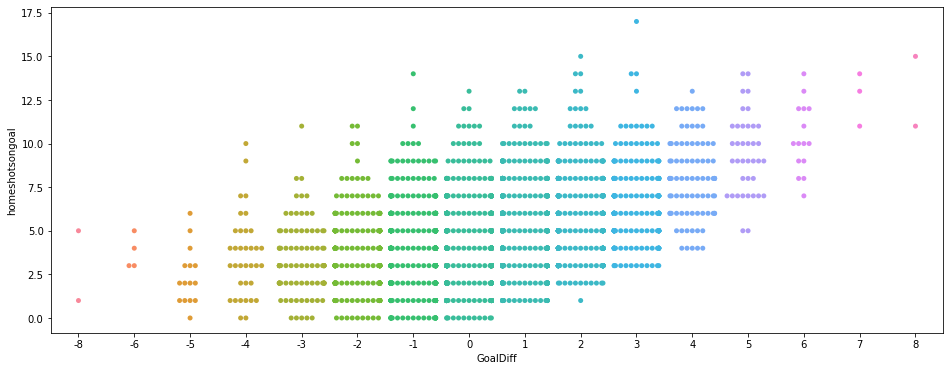

In [ ]:
plt.figure(figsize=(16,6))

sns.swarmplot(x=df['GoalDiff'],
              y=df['homeshotsongoal'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.6% of the points cannot be placed; yo

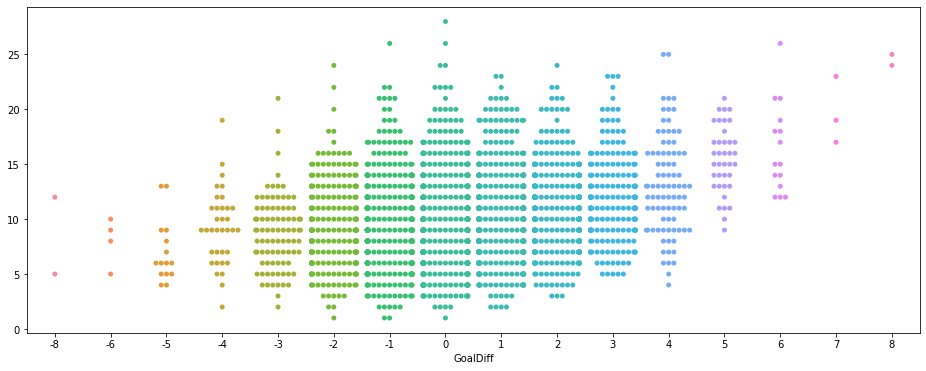

In [ ]:
plt.figure(figsize=(16,6))

sns.swarmplot(x=df['GoalDiff'],
              y=df['homeshotsongoal']+df['homeshotsoffgoal'])

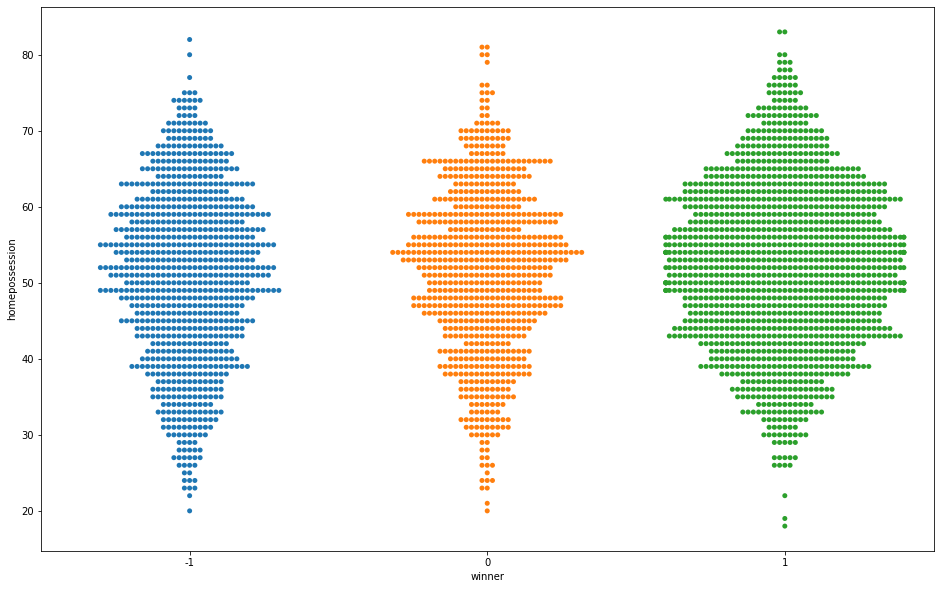

In [ ]:
plt.figure(figsize=(16,10))
sns.swarmplot(x=df['winner'],
              y=df['homepossession'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


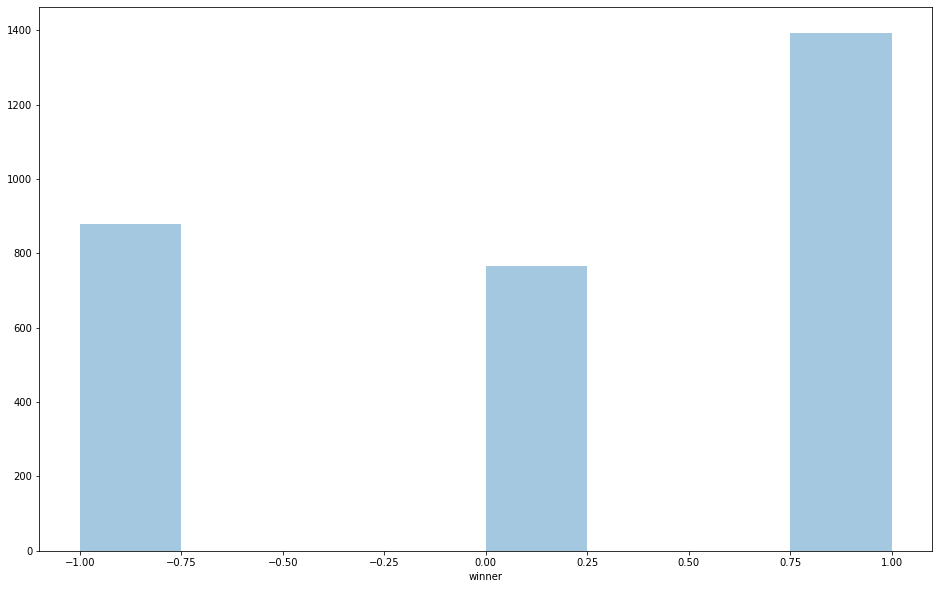

In [ ]:
plt.figure(figsize=(16,10))
sns.distplot(a=df['winner'], kde=False)

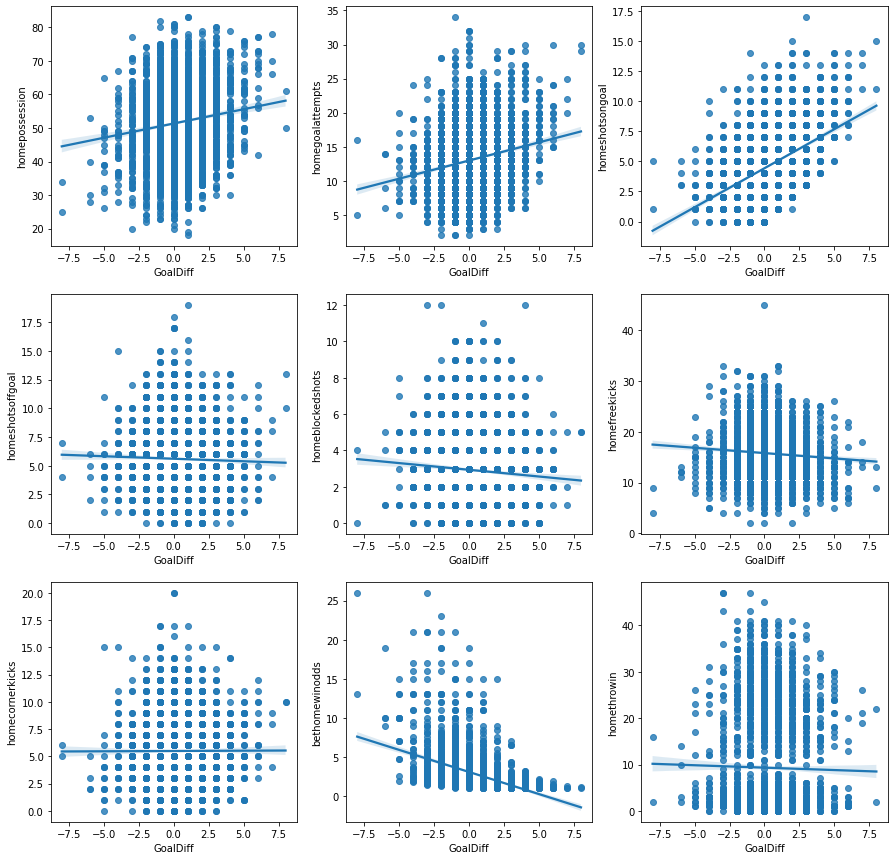

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.regplot(x=df['GoalDiff'], y=df['homepossession'])

plt.subplot(3,3,2)
sns.regplot(x=df['GoalDiff'], y=df['homegoalattempts'])

plt.subplot(3,3,3)
sns.regplot(x=df['GoalDiff'], y=df['homeshotsongoal'])

plt.subplot(3,3,4)
sns.regplot(x=df['GoalDiff'], y=df['homeshotsoffgoal'])

plt.subplot(3,3,5)
sns.regplot(x=df['GoalDiff'], y=df['homeblockedshots'])

plt.subplot(3,3,6)
sns.regplot(x=df['GoalDiff'], y=df['homefreekicks'])

plt.subplot(3,3,7)
sns.regplot(x=df['GoalDiff'], y=df['homecornerkicks'])

plt.subplot(3,3,8)
sns.regplot(x=df['GoalDiff'], y=df['bethomewinodds'])

plt.subplot(3,3,9)
sns.regplot(x=df['GoalDiff'], y=df['homethrowin'])

Text(0, 0.5, 'Kaput találó lövések száma')

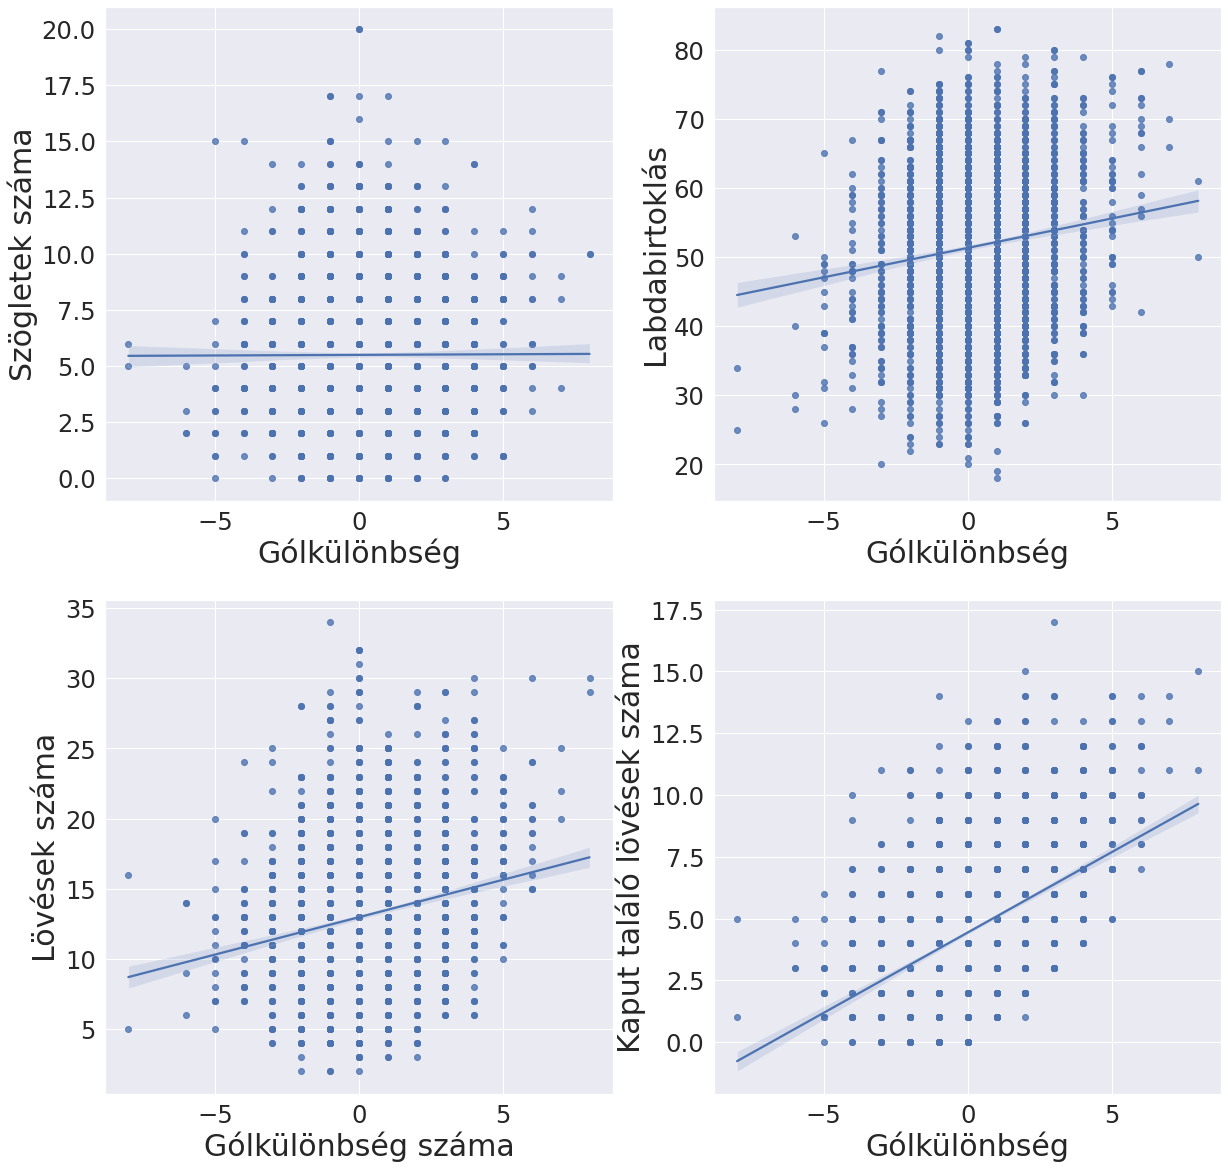

In [ ]:
plt.figure(figsize=(20,20))
sns.set(font_scale=2.2)
plt.subplot(2,2,1)
ax1 = sns.regplot(x=df['GoalDiff'], y=df['homecornerkicks'])
ax1.set_xlabel("Gólkülönbség",fontsize=30)
ax1.set_ylabel("Szögletek száma",fontsize=30)

plt.subplot(2,2,2)
ax2 = sns.regplot(x=df['GoalDiff'], y=df['homepossession'])
ax2.set_xlabel("Gólkülönbség",fontsize=30)
ax2.set_ylabel("Labdabirtoklás",fontsize=30)

plt.subplot(2,2,3)
ax3 = sns.regplot(x=df['GoalDiff'], y=df['homegoalattempts'])
ax3.set_xlabel("Gólkülönbség száma",fontsize=30)
ax3.set_ylabel("Lövések száma",fontsize=30)

plt.subplot(2,2,4)
ax4 = sns.regplot(x=df['GoalDiff'], y=df['homeshotsongoal'])
ax4.set_xlabel("Gólkülönbség",fontsize=30)
ax4.set_ylabel("Kaput találó lövések száma",fontsize=30)

[Text(0, 0.5, 'Kaput találó lövések száma'), Text(0.5, 0, 'Gólkülönbség')]

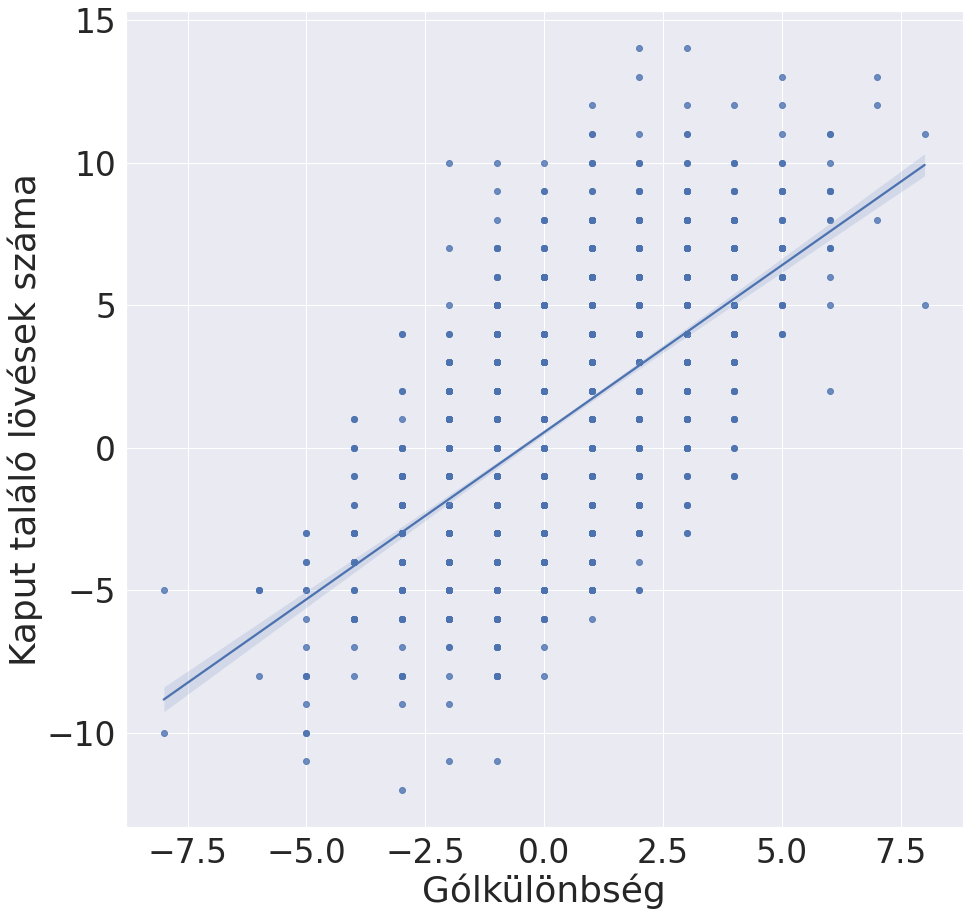

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.regplot(x=df['GoalDiff'], y=df['homeshotsongoal']-df['guestshotsongoal'])
ax.set(xlabel='Gólkülönbség', ylabel='Kaput találó lövések száma')

Melyik diagramot érdemes választani?
https://www.kaggle.com/alexisbcook/choosing-plot-types-and-custom-styles

# **KorrelációVizsgálat**

---


In [ ]:
correlation_df = df.corr()

In [ ]:
correlation_df.loc[:, ['GoalDiff']]
''''def corrhome(value)
def corrdraw(value)
def corrguest(value)
def calcvalue(idx):
  value = df.loc[idx, homepossession]
  value +=df.loc[idx, guestpossession]
  value +=df.loc[idx, homegoalattempts]
  value +=df.loc[idx, guestgoalattempts]
  value +=df.loc[idx, homeshotsongoal]
  value +=df.loc[idx, guestshotsongoal]
  value +=df.loc[idx, homeshotsoffgoal]
  value +=df.loc[idx, homeblockedshots]
  value +=df.loc[idx, guestshotsoffgoal]
  value +=df.loc[idx, guestblockedshots]
  value +=df.loc[idx, homefreekicks]
  value +=df.loc[idx, guestfreekicks]
  value +=df.loc[idx, homecornerkicks]
  value +=df.loc[idx, guestcornerkicks]
  value +=df.loc[idx, guestshotsoffgoal]
  #corrHomeOdds corrDrawOdds corrGuestOdds
for idx in df.index:
  value = calcvalue(idx)
  corrhome(value)
  corrdraw(value)
  corrguest(value)'''

"'def corrhome(value)\ndef corrdraw(value)\ndef corrguest(value)\ndef calcvalue(idx):\n  value = df.loc[idx, homepossession]\n  value +=df.loc[idx, guestpossession]\n  value +=df.loc[idx, homegoalattempts]\n  value +=df.loc[idx, guestgoalattempts]\n  value +=df.loc[idx, homeshotsongoal]\n  value +=df.loc[idx, guestshotsongoal]\n  value +=df.loc[idx, homeshotsoffgoal]\n  value +=df.loc[idx, homeblockedshots]\n  value +=df.loc[idx, guestshotsoffgoal]\n  value +=df.loc[idx, guestblockedshots]\n  value +=df.loc[idx, homefreekicks]\n  value +=df.loc[idx, guestfreekicks]\n  value +=df.loc[idx, homecornerkicks]\n  value +=df.loc[idx, guestcornerkicks]\n  value +=df.loc[idx, guestshotsoffgoal]\n  #corrHomeOdds corrDrawOdds corrGuestOdds\nfor idx in df.index:\n  value = calcvalue(idx)\n  corrhome(value)\n  corrdraw(value)\n  corrguest(value)"

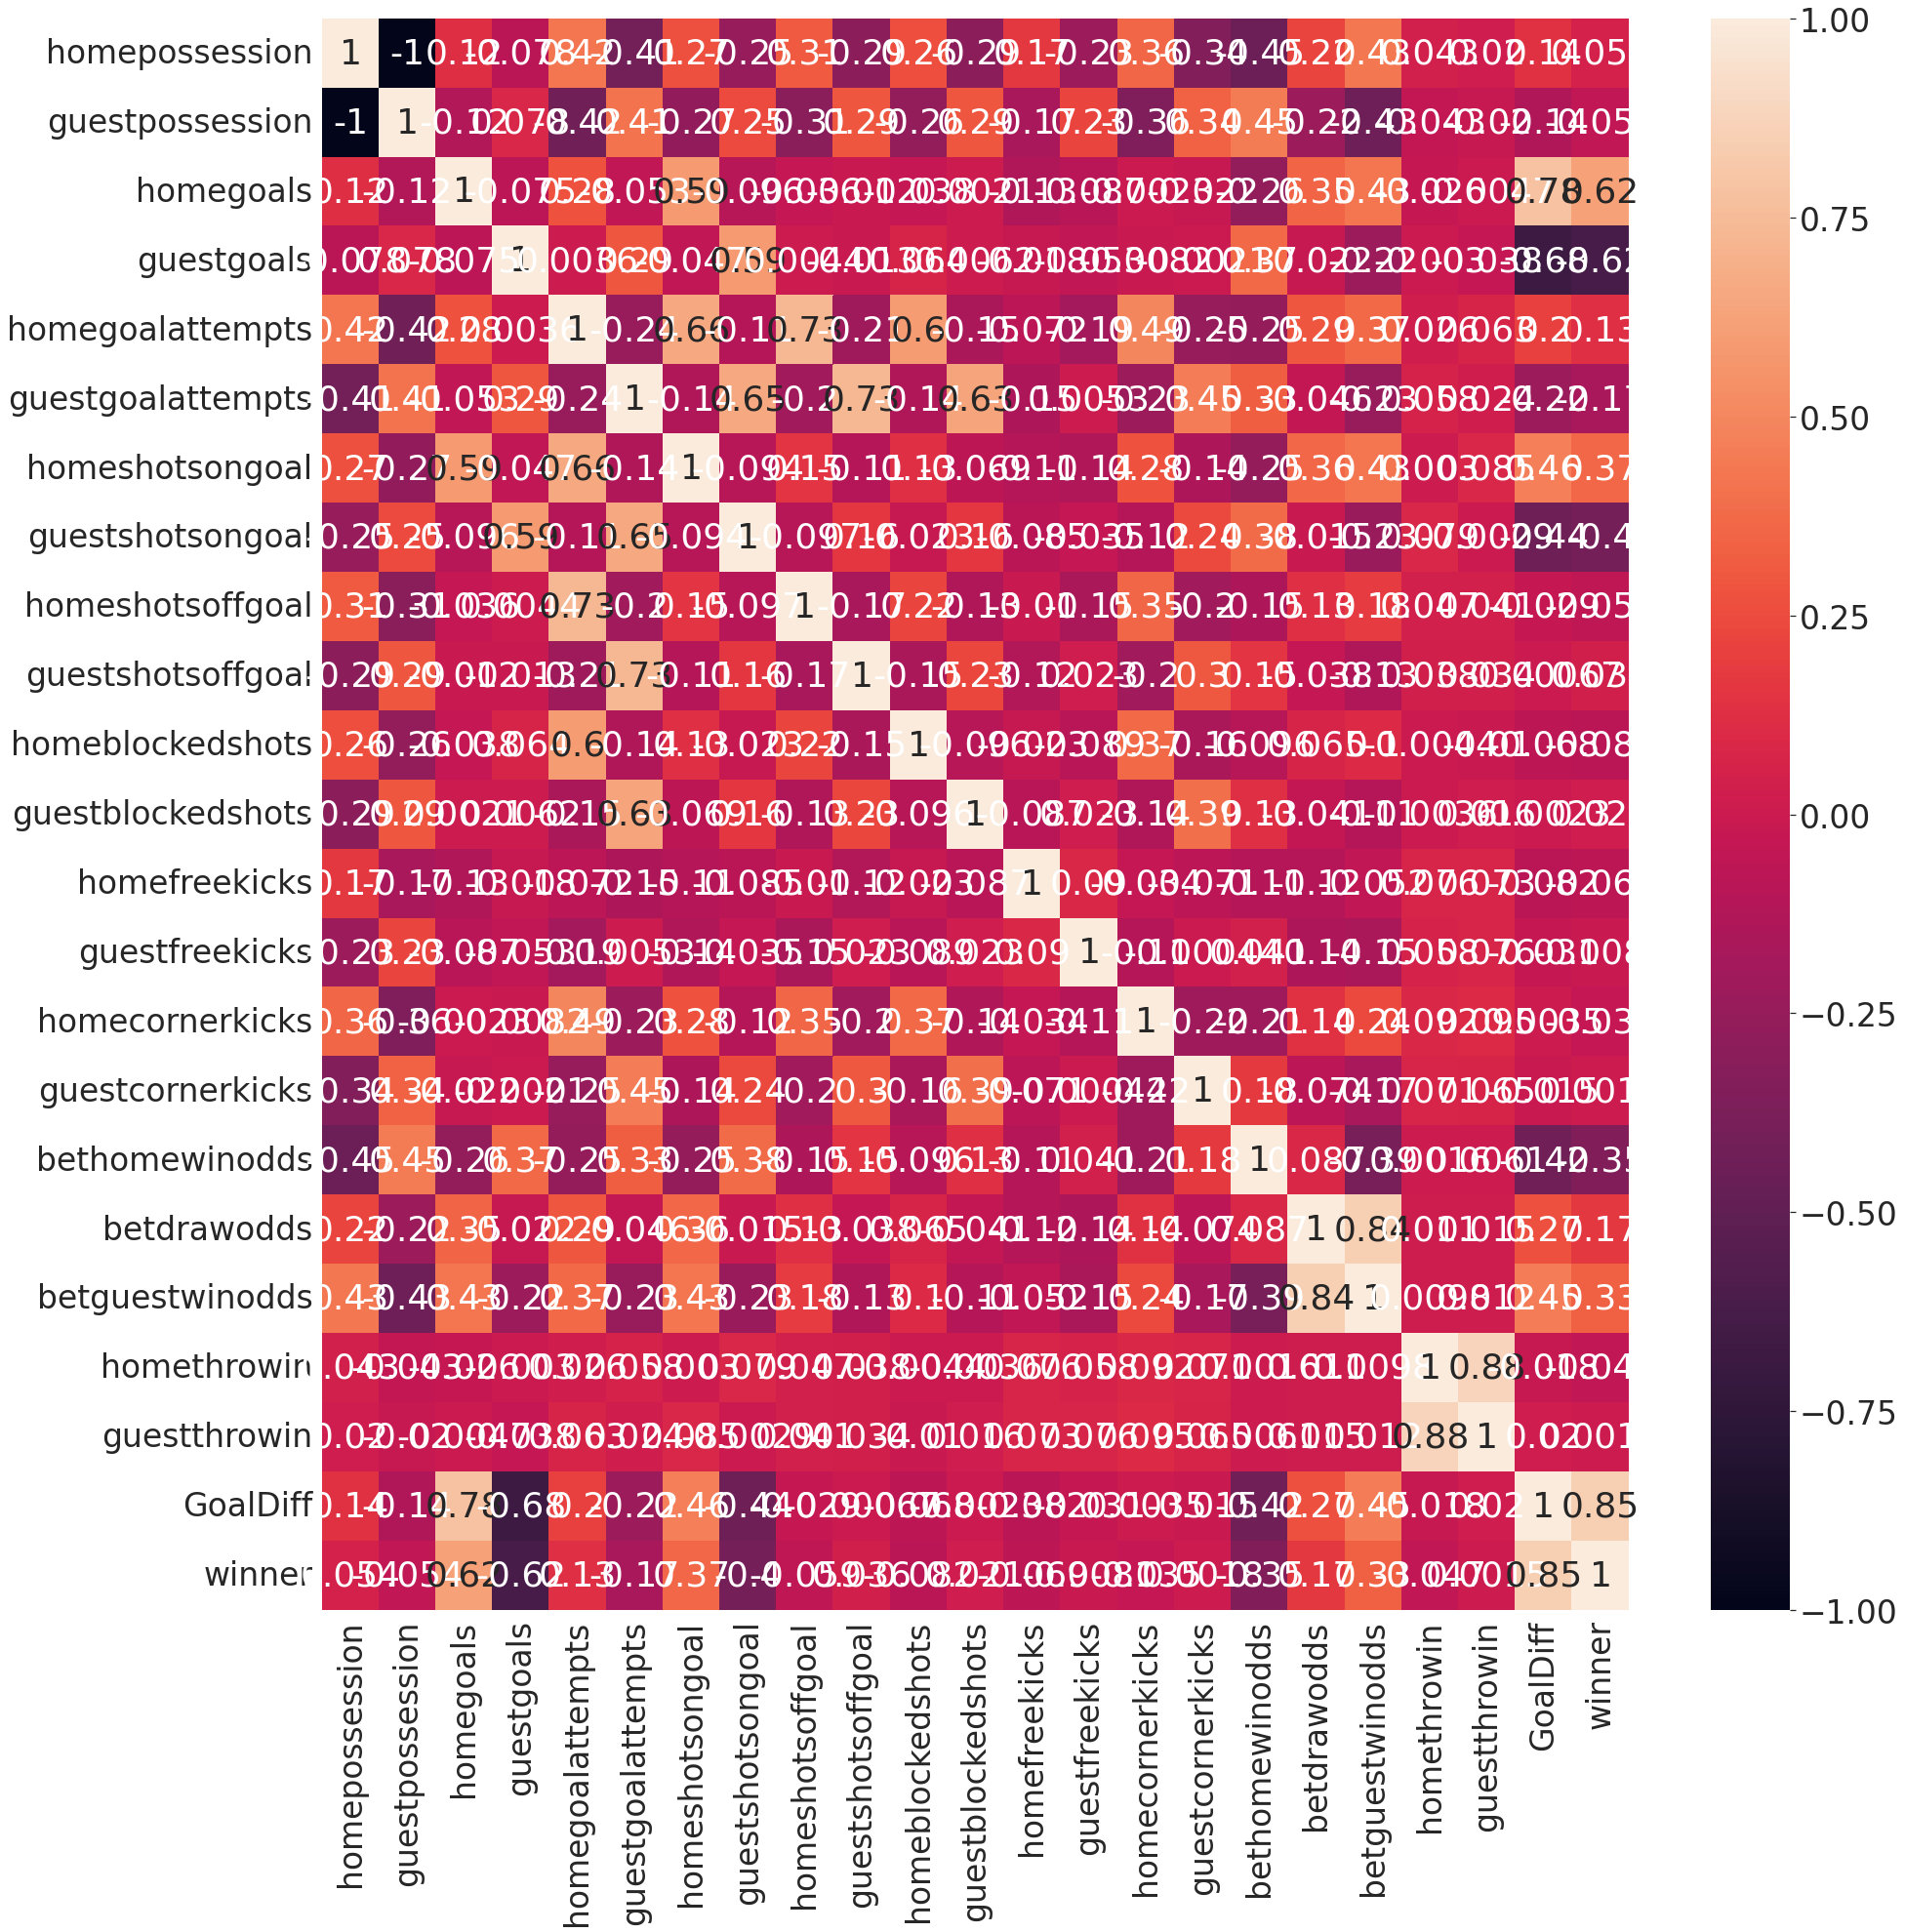

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation_df, annot=True)
plt.show()

In [ ]:
'''plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(df.GoalDiff))

ax.barh(y_pos, df.homegoalattempts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(df.GoalDiff)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('hazai próbálkozás')
ax.set_title('Gól/hazai próbálkozás korreláció')'''


"plt.rcdefaults()\nfig, ax = plt.subplots()\n\ny_pos = np.arange(len(df.GoalDiff))\n\nax.barh(y_pos, df.homegoalattempts, align='center')\nax.set_yticks(y_pos)\nax.set_yticklabels(df.GoalDiff)\nax.invert_yaxis()  # labels read top-to-bottom\nax.set_xlabel('hazai próbálkozás')\nax.set_title('Gól/hazai próbálkozás korreláció')"

In [ ]:
'''unigd = df['GoalDiff'].unique().tolist()
uniha = df['homegoalattempts'].unique().tolist()
unigd.sort()
uniha.sort()

print(unigd)'''

"unigd = df['GoalDiff'].unique().tolist()\nuniha = df['homegoalattempts'].unique().tolist()\nunigd.sort()\nuniha.sort()\n\nprint(unigd)"

In [ ]:
#for row in useful.rows:

# **adathalmaz kiegyensúlyozása**

---


oversampling(Smote) https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb
https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#train test halmaz kiválasztása
X = df.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df.loc[:,['winner']]

In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=7)

In [ ]:
trainX, trainY = sm.fit_resample(X, y)

In [ ]:
df_oversampler = pd.DataFrame(trainX, columns = [
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'])
df_oversampler['winner'] = trainY

In [ ]:
df_oversampler.head(5)

,homepossession,guestpossession,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,winner
0,67.0,33.0,11,6,3,3,3,2,5,1,18,14,9,2,0
1,65.0,35.0,12,11,6,2,6,7,0,2,23,15,4,3,1
2,61.0,39.0,14,7,2,2,10,4,2,1,16,8,3,5,1
3,58.0,42.0,9,10,3,3,4,6,2,1,16,12,6,3,0
4,57.0,43.0,10,5,2,2,5,3,3,0,25,12,7,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


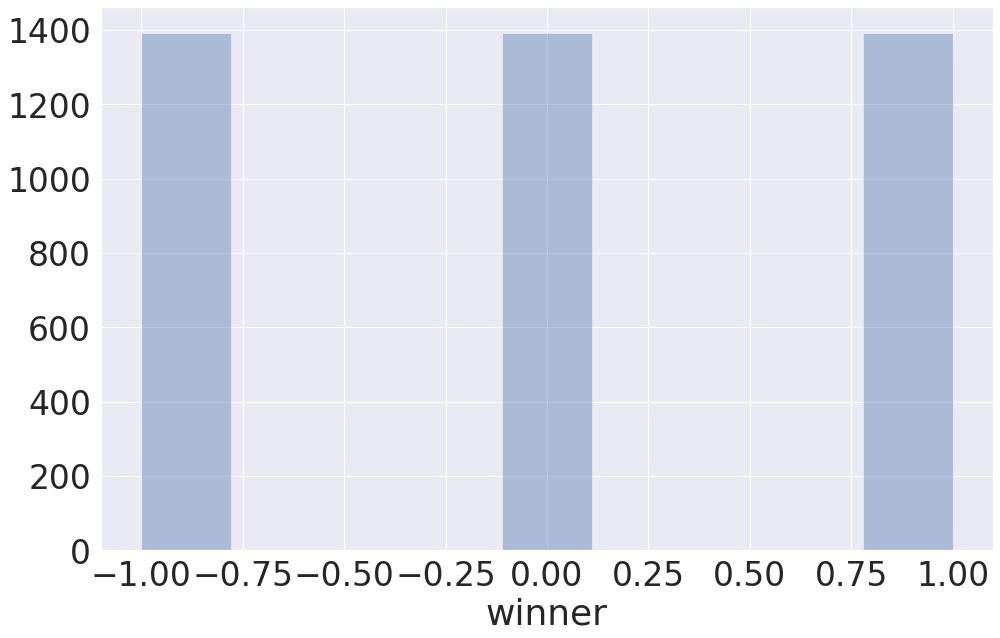

In [ ]:
plt.figure(figsize=(16,10))
sns.distplot(a=df_oversampler['winner'], kde=False)

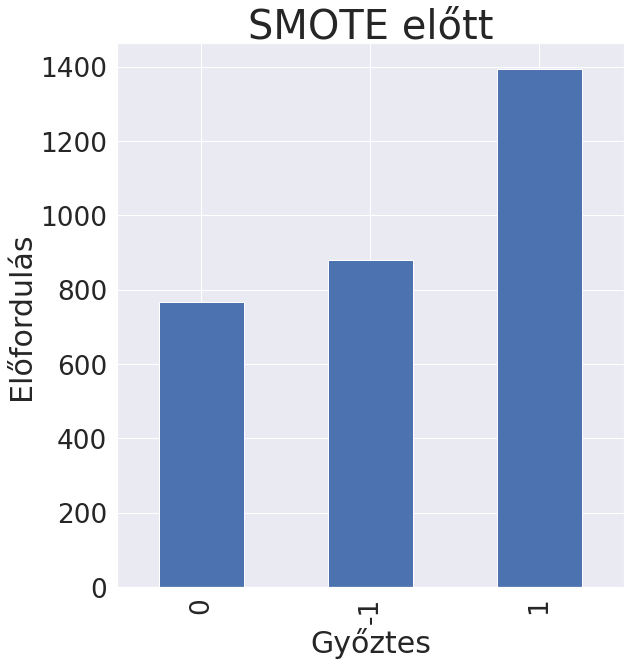

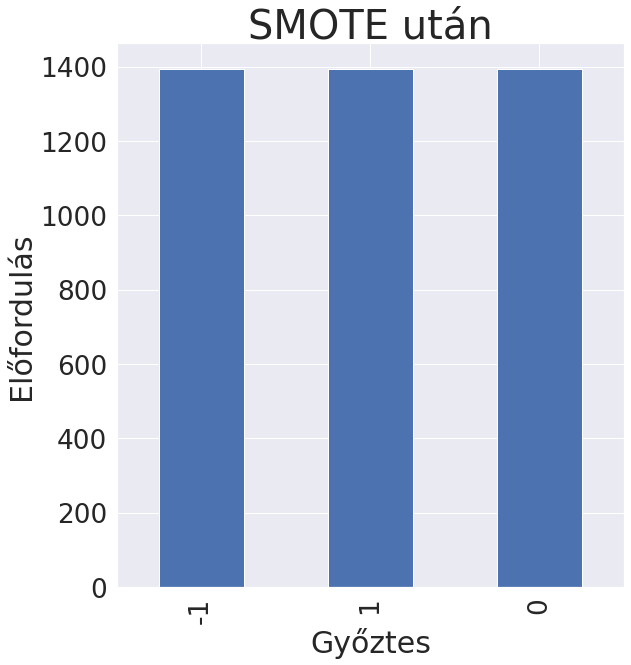

In [ ]:
sns.set(font_scale=2.4)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
a1 = df.winner.value_counts().sort_values().plot.bar()
plt.title("SMOTE előtt",fontsize=40)
plt.xlabel("Győztes",fontsize=30)
plt.ylabel("Előfordulás",fontsize=30)
plt.show(block=True)

plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.xticks(rotation=90)
a2 = df_oversampler.winner.value_counts().sort_values().plot.bar()
plt.title("SMOTE után",fontsize=40)
plt.xlabel("Győztes",fontsize=30)
plt.ylabel("Előfordulás",fontsize=30)
plt.show(block=True)


# **TRAIN TESZT KÉSZÍTÉS**

---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_oversampler.isnull().sum()

homepossession       0
guestpossession      0
homegoalattempts     0
guestgoalattempts    0
homeshotsongoal      0
guestshotsongoal     0
homeshotsoffgoal     0
guestshotsoffgoal    0
homeblockedshots     0
guestblockedshots    0
homefreekicks        0
guestfreekicks       0
homecornerkicks      0
guestcornerkicks     0
winner               0
dtype: int64

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df.loc[:,['winner']]
print(X)
print(y)

      homepossession  guestpossession  ...  homecornerkicks  guestcornerkicks
0               67.0             33.0  ...                9                 2
1               65.0             35.0  ...                4                 3
2               61.0             39.0  ...                3                 5
3               58.0             42.0  ...                6                 3
4               57.0             43.0  ...                7                 2
...              ...              ...  ...              ...               ...
3035            32.0             68.0  ...                1                 6
3036            50.0             50.0  ...                8                 2
3037            60.0             40.0  ...               10                 2
3038            54.0             46.0  ...                2                 1
3039            64.0             36.0  ...                3                 4

[3039 rows x 14 columns]
      winner
0          0
1          1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

34034
2431


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 2170 to 2915
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   homepossession     2431 non-null   float64
 1   guestpossession    2431 non-null   float64
 2   homegoalattempts   2431 non-null   int64  
 3   guestgoalattempts  2431 non-null   int64  
 4   homeshotsongoal    2431 non-null   int64  
 5   guestshotsongoal   2431 non-null   int64  
 6   homeshotsoffgoal   2431 non-null   int64  
 7   guestshotsoffgoal  2431 non-null   int64  
 8   homeblockedshots   2431 non-null   int64  
 9   guestblockedshots  2431 non-null   int64  
 10  homefreekicks      2431 non-null   int64  
 11  guestfreekicks     2431 non-null   int64  
 12  homecornerkicks    2431 non-null   int64  
 13  guestcornerkicks   2431 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 284.9 KB


# **SKÁLÁZÁS**

---



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
##train test halmaz kiválasztása
#X = df.loc[:,[
#              'PossessionDiff', 'GoalattemptsDiff', 'ShotsongoalDiff',
#       'ShotsoffgoalDiff', 'BlockedshotsDiff', 'CornerkicksDiff'
#              ]]
#y = df.loc[:,['winner']]
#print(X)
#print(y)

In [ ]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
X_train_s

array([[0.24615385, 0.75384615, 0.1875    , ..., 0.66666667, 0.1       ,
        0.41176471],
       [0.49230769, 0.50769231, 0.25      , ..., 0.57575758, 0.3       ,
        0.23529412],
       [0.26153846, 0.73846154, 0.28125   , ..., 0.24242424, 0.2       ,
        0.23529412],
       ...,
       [0.35384615, 0.64615385, 0.34375   , ..., 0.57575758, 0.15      ,
        0.41176471],
       [0.52307692, 0.47692308, 0.15625   , ..., 0.72727273, 0.1       ,
        0.05882353],
       [0.46153846, 0.53846154, 0.28125   , ..., 0.51515152, 0.35      ,
        0.29411765]])

# **Feature Selection**

---




https://www.youtube.com/watch?v=pcZ4YlvhSKU&ab_channel=KGPTalkie



In [ ]:
from numpy import std
from numpy import mean
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
RFEresults = []
def run_randomForest(X_train,X_test ,y_train,y_test,index):
  clf = RandomForestClassifier(n_estimators=20, random_state=0, n_jobs= -1)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('Accuracy: ', accuracy_score(y_test, y_pred))
  RFEresults.append(accuracy_score(y_test, y_pred))

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=12)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores

array([0.48190789, 0.46875   , 0.51809211, 0.50493421, 0.50082372,
       0.47368421, 0.47203947, 0.48026316, 0.46710526, 0.50247117,
       0.52796053, 0.47532895, 0.49506579, 0.45559211, 0.48764415])

In [ ]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.487 (0.020)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

34034
2431


SelectFromModel módszerrel

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs= -1))
sel.fit(X_train, y_train)
#random forrest után melyikeket találta hasznosnak(true)
sel.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


array([False,  True, False, False,  True,  True, False, False, False,
       False,  True,  True, False, False])

In [ ]:
len(sel.get_support())

14

In [ ]:
#random forrest után melyikeket találta hasznosnak
features = X_train.columns[sel.get_support()]
features

Index(['guestpossession', 'homeshotsongoal', 'guestshotsongoal',
       'homefreekicks', 'guestfreekicks'],
      dtype='object')

In [ ]:
np.mean(sel.estimator_.feature_importances_)

0.07142857142857142

In [ ]:
sel.estimator_.feature_importances_

array([0.06777135, 0.07338594, 0.06962131, 0.0674551 , 0.10953731,
       0.11221342, 0.06426481, 0.05851933, 0.05396541, 0.04852997,
       0.07480788, 0.07463041, 0.06460963, 0.06068814])

In [ ]:
X_train.columns

Index(['homepossession', 'guestpossession', 'homegoalattempts',
       'guestgoalattempts', 'homeshotsongoal', 'guestshotsongoal',
       'homeshotsoffgoal', 'guestshotsoffgoal', 'homeblockedshots',
       'guestblockedshots', 'homefreekicks', 'guestfreekicks',
       'homecornerkicks', 'guestcornerkicks'],
      dtype='object')

**RFE**

In [ ]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs= -1), n_features_to_select=8)
sel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expe

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=8)

In [ ]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True, False, False])

In [ ]:
features = X_train.columns[sel.get_support()]
features

Index(['homepossession', 'guestpossession', 'homegoalattempts',
       'guestgoalattempts', 'homeshotsongoal', 'guestshotsongoal',
       'homefreekicks', 'guestfreekicks'],
      dtype='object')

**Feature selection by GradientBoost Tree Importance**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Hosszú fv a RFE tesztelésre, hogy hány attr a legalkalmasabb
for index in range(2,8):
  sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select=index)
  sel.fit(X_train, y_train)
  X_train_rfe = sel.transform(X_train)
  X_test_rfe = sel.transform(X_test)
  print('Selected features?', index)
  run_randomForest(X_train_rfe,X_test_rfe,y_train,y_test,index)
  print()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Selected features? 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy:  0.59375



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Selected features? 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy:  0.5625



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Selected features? 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy:  0.5115131578947368



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Selected features? 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy:  0.5822368421052632



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

# **TRAIN TESZT KÉSZÍTÉS**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **TRAIN TESZT KÉSZÍTÉS(Df-feltöltéshez)**

---



In [ ]:
df.isnull().sum()

In [ ]:
#train test halmaz kiválasztása
X_df = df.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y_df = df.loc[:,['winner']]
print(X)
print(y)

# **MODELLKÉSZÍTÉS**

---



In [ ]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# **RandomForestClassifier 2(RFE felhasználás)**

In [ ]:
sel.score(X_test, y_test)

In [ ]:
df_t = pd.DataFrame(df)
df_t.head()

In [ ]:
sel_model_pred = sel.predict_proba(X)
sel_model_pred
sel_model_fpred = sel.predict(X)


In [ ]:
dfhelp = pd.DataFrame(sel_model_pred)
dfhelp.info()

In [ ]:
df_t['PredictedHomeOdds'] = 1/dfhelp[2]
df_t['PredictedDrawOdds'] = 1/dfhelp[1]
df_t['PredictedGuestOdds'] = 1/dfhelp[0]

In [ ]:
df_t.head(20)

In [ ]:
money = 10000
money_history = []
for idx in df.index: 
  if df.loc[idx, 'bethomewinodds'] > df.loc[idx, 'PredictedHomeOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 1:
      betwin = 0.25 * money * df.loc[idx, 'bethomewinodds']
    elif df.loc[idx, 'winner'] != 1:
      betwin = 0
    money = money + betwin
    money_history.append(money)

In [ ]:
money_history[-1]

# **TRAIN TESZT KÉSZÍTÉS**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df_oversampler.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df_oversampler.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **TRAIN TESZT KÉSZÍTÉS(Oversampled)**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df_oversampler.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df_oversampler.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **DecisionTreeClassifier**

---



In [ ]:
dtc_model = DecisionTreeClassifier(random_state=0)

In [ ]:
dtc_model.fit(X_train,y_train)

In [ ]:
dtc_model.score(X_test, y_test)

In [ ]:
path = dtc_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_aplhas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    dtc_model = DecisionTreeClassifier(random_state = 0, ccp_alpha =ccp_alpha)
    dtc_model.fit(X_train, y_train)
    clf_dts.append(dtc_model)

In [ ]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    dtc_model = DecisionTreeClassifier(random_state = 0, ccp_alpha =ccp_alpha)
    scores = cross_val_score(dtc_model, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean_accuracy', 'std'])

In [ ]:
alpha_results.plot(x='alpha',
                  y= 'mean_accuracy',
                   yerr = 'std',
                  marker ='o',
                  linestyle= '--',
                   figsize=(20,14))

In [ ]:
alpha_results.mean_accuracy.max()

In [ ]:
dtc_model = DecisionTreeClassifier(ccp_alpha = 0)
dtc_model = dtc_model.fit(X_train, y_train)

In [ ]:
dtc_model_pred = dtc_model.predict_proba(X_df)
dtc_model_pred
dtcmodel_fpred = dtc_model.predict(X_df)

In [ ]:
dtc_dfhelp = pd.DataFrame(dtc_model_pred)
dtc_dfhelp.info()

In [ ]:
df_t['PredictedHomeOdds'] = 1/dtc_dfhelp[2]
df_t['PredictedDrawOdds'] = 1/dtc_dfhelp[1]
df_t['PredictedGuestOdds'] = 1/dtc_dfhelp[0]
df_t['PredictedWinner'] = dtcmodel_fpred

In [ ]:
df_t.head(20)

In [ ]:
money = 10000
money_history = []
for idx in df.index: 
  if df.loc[idx, 'bethomewinodds'] > df.loc[idx, 'PredictedHomeOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 1:
      betwin = 0.25 * money * df.loc[idx, 'bethomewinodds']
    elif df.loc[idx, 'winner'] != 1:
      betwin = 0
    money = money + betwin
    money_history.append(money)

# **TRAIN TESZT KÉSZÍTÉS**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **TRAIN TESZT KÉSZÍTÉS(Oversampled)**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df_oversampler.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df_oversampler.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **LinearRegression**

---



In [ ]:
#.values will give the values in an array. (shape: (n,1)
#.ravel will convert that array shape to (n, )
linearr_model = LinearRegression()
linearr_model.fit(X_train,y_train)

In [ ]:
linearr_model.score(X_test, y_test)

In [ ]:
linearr_model.score(X_train,y_train)

# **TRAIN TESZT KÉSZÍTÉS**

---



In [ ]:
#train test halmaz kiválasztása
X = df.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **TRAIN TESZT KÉSZÍTÉS(Oversampled)**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df_oversampler.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df_oversampler.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **LogisticRegression**

---



In [ ]:
#.values will give the values in an array. (shape: (n,1)
#.ravel will convert that array shape to (n, )
lr_model = LogisticRegression(multi_class = 'multinomial', random_state=42)
lr_model.fit(X_train,y_train.values.ravel())

In [ ]:
lr_model.score(X_test, y_test)

In [ ]:
lr_model_pred = lr_model.predict_proba(X)
lr_model_pred

In [ ]:
dfhelp = pd.DataFrame(lr_model_pred)
dfhelp.info()

In [ ]:
df['PredictedHomeOdds'] = dfhelp[2].map(lambda x: 1/x).astype(float)
df['PredictedDrawOdds'] = dfhelp[1].map(lambda x: 1/x).astype(float)
df['PredictedGuestOdds'] = dfhelp[0].map(lambda x: 1/x).astype(float)

In [ ]:
df.head(10)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(X.size)
print(y.size)

In [ ]:
y_pred = lr_model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [ ]:
money = 10000
money_history = []
for idx in df.index: 
  if df.loc[idx, 'bethomewinodds'] > df.loc[idx, 'PredictedHomeOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 1:
      betwin = 0.25 * money * df.loc[idx, 'bethomewinodds']
    elif df.loc[idx, 'winner'] != 1:
      betwin = 0
    money = money + betwin
    money_history.append(money)

In [ ]:
money_history[-1]

In [ ]:
#modell készítés vendég győzelemhez és adathalmaz feltöltés 
"""          X = df.drop(['matches','hometeamname','guestteamname','date','bethomewinodds','betdrawodds','betguestwinodds'], axis =1).copy()
          y = df.loc[:,['betguestwinodds']]
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
          model = DecisionTreeRegressor()
          model.fit(X_train,y_train)

          Guestrawpred = model.predict(X)
          df['Guestrawpred'] = Guestrawpred
          df.head()"""

In [ ]:
#sportfogadóiroda által levett odds százalékos arányban 
"""def calcBeteventspace(a, b, c):
    eventspace = 1/a + 1/b +1/c
    return 1 / eventspace

beteventarray = df.apply(lambda row: calcBeteventspace(row['bethomewinodds'],row['betdrawodds'],row['betguestwinodds']),axis = 1)
meanBeteventspace = np.mean(beteventarray)
meanBeteventspace"""

In [ ]:
#helyes oddsok kiszámolása
"""def correctodds(a, b, c, d):
    teljesesemenyter = 1/a + 1/b +1/c
    corrodds =1/((1/d) / teljesesemenyter)
    return corrodds * meanBeteventspace

df = df.assign(CurrectHomeOdds=lambda x: correctodds(x.Homerawpred,x.Drawrawpred, x.Guestrawpred,x.Homerawpred))
df = df.assign(CurrectDrawOdds=lambda x: correctodds(x.Homerawpred,x.Drawrawpred, x.Guestrawpred,x.Drawrawpred))
df = df.assign(CurrectGuestOdds=lambda x: correctodds(x.Homerawpred,x.Drawrawpred, x.Guestrawpred,x.Guestrawpred))
df.head()"""

# **TRAIN TESZT KÉSZÍTÉS**

---



df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              #'homeshotsoffgoal','guestshotsoffgoal',
              #'homeblockedshots','guestblockedshots',
              #'homefreekicks','guestfreekicks',
              #'homecornerkicks','guestcornerkicks'
              ]]
y = df.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **TRAIN TESZT KÉSZÍTÉS(Oversampled)**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df_oversampler.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df_oversampler.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **K nearest neighbors**

---



https://www.youtube.com/watch?v=0BGLfYY26zQ&ab_channel=DataProfessor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef

In [ ]:
knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model

In [ ]:
# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy

In [ ]:
# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy

In [ ]:
print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)

# **TRAIN TESZT KÉSZÍTÉS(Oversampled)**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df_oversampler.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df_oversampler.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **TRAIN TESZT KÉSZÍTÉS(Oversampled)**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df_oversampler.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df_oversampler.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **Support vector machine**

---



https://www.youtube.com/watch?v=0BGLfYY26zQ&ab_channel=DataProfessor

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train, y_train)

In [ ]:
# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

In [ ]:
# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy

In [ ]:
# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy

In [ ]:
print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)

# **TRAIN TESZT KÉSZÍTÉS**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **TRAIN TESZT KÉSZÍTÉS(Oversampled)**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df_oversampler.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df_oversampler.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **Neural network - Sklearn**

---

https://www.youtube.com/watch?v=0BGLfYY26zQ&ab_channel=DataProfessor

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

In [ ]:
# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

In [ ]:
#y_test_pred

In [ ]:
# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy

In [ ]:
# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy


In [ ]:
print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)

# **TRAIN TESZT KÉSZÍTÉS**

---



In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **TRAIN TESZT KÉSZÍTÉS(Oversampled)**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df_oversampler.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df_oversampler.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **Gradient Boosting**

---



https://www.youtube.com/watch?v=BVMa4nXjQCM&ab_channel=HarshKumar

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [ ]:
model_gbm = GradientBoostingClassifier(n_estimators=5000,
                                       learning_rate=0.05,
                                       max_depth=3,
                                       subsample=0.5,
                                       validation_fraction=0.1,
                                       n_iter_no_change=20,
                                       max_features='log2',
                                       verbose=1)

In [ ]:
model_gbm.fit(X_train, y_train)

In [ ]:
len(model_gbm.estimators_)

In [ ]:
y_train_pred = model_gbm.predict(X_train)
y_valid_pred = model_gbm.predict(X_test)

In [ ]:
# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy

In [ ]:
# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy


In [ ]:
print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)

In [ ]:
proba = model_gbm.predict_proba(X)

In [ ]:
proba

In [ ]:
df.head()

# **Exportálás**

---



In [ ]:
#exportálás
df.to_csv (r'D:\Desktop\aSzakdoga\models\cleareddf.csv')

In [ ]:
#df2 létrehozás és exportálás
df2 = df.drop(['homepossession','guestpossession','homegoals','guestgoals','homegoalattempts','guestgoalattempts','homeshotsongoal','guestshotsongoal',
               'homeshotsoffgoal','guestshotsoffgoal','homeblockedshots','guestblockedshots','homefreekicks','guestfreekicks','homecornerkicks',
               'guestcornerkicks','homethrowin','guestthrowin'], axis =1).copy()
df2.to_csv (r'D:\Desktop\aSzakdoga\models\basicdf2.csv')

In [ ]:
preddf = pd.DataFrame({'A': y_test, 'B': y_predicted}, index=y_test.index)
preddf

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
plt.figure(figsize = (15,5))
sns.jointplot(x=df['homegoals'], y=df['guestgoals'],  kind="kde")

In [ ]:
df.head(5)

# **TRAIN TESZT KÉSZÍTÉS(original data)**

---



In [ ]:
df.isnull().sum()

In [ ]:
for idx in df.index: 
  if df.loc[idx, 'winner'] == 1:
    df.loc[idx, 'HomeTeamWin'] = 1
    df.loc[idx, 'Draw'] = 0
    df.loc[idx, 'GuestTeamWin'] = 0
  elif df.loc[idx, 'winner'] == 0:
    df.loc[idx, 'HomeTeamWin'] = 0
    df.loc[idx, 'Draw'] = 1
    df.loc[idx, 'GuestTeamWin'] = 0
  elif df.loc[idx, 'winner'] == -1:
    df.loc[idx, 'HomeTeamWin'] = 0
    df.loc[idx, 'Draw'] = 0
    df.loc[idx, 'GuestTeamWin'] = 1

In [ ]:
df.head(10)

In [ ]:
#train test halmaz kiválasztása
X = df.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df.loc[:,['HomeTeamWin','Draw','GuestTeamWin']]
print(X)
print(y)

# **TRAIN TESZT KÉSZÍTÉS(Oversampled data)**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
for idx in df_oversampler.index: 
  if df_oversampler.loc[idx, 'winner'] == 1:
    df_oversampler.loc[idx, 'HomeTeamWin'] = 1
    df_oversampler.loc[idx, 'Draw'] = 0
    df_oversampler.loc[idx, 'GuestTeamWin'] = 0
  elif df_oversampler.loc[idx, 'winner'] == 0:
    df_oversampler.loc[idx, 'HomeTeamWin'] = 0
    df_oversampler.loc[idx, 'Draw'] = 1
    df_oversampler.loc[idx, 'GuestTeamWin'] = 0
  elif df_oversampler.loc[idx, 'winner'] == -1:
    df_oversampler.loc[idx, 'HomeTeamWin'] = 0
    df_oversampler.loc[idx, 'Draw'] = 0
    df_oversampler.loc[idx, 'GuestTeamWin'] = 1

In [ ]:
df_oversampler.head(10)

In [ ]:
#train test halmaz kiválasztása
X = df_oversampler.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df_oversampler.loc[:,['HomeTeamWin','Draw','GuestTeamWin']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **TENSORFLOW**

---



https://www.youtube.com/watch?v=6_2hzRopPbQ&ab_channel=NicholasRenotte
https://www.youtube.com/watch?v=bqBRET7tbiQ&ab_channel=DigitalSreeni

In [ ]:
from tensorflow import keras
from tensorflow import lite

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_mm = MinMaxScaler()
#scaler_mm.fit(X)
X = scaler_mm.fit_transform(X)
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify = y)

In [ ]:
neuralmodel = Sequential()
neuralmodel.add(Dense(3))

In [ ]:
neuralmodel.compile(loss='mean_squared_error', optimizer='sgd')
print(neuralmodel.summary)

In [ ]:
neuralmodel.fit(X_train, y_train, verbose = 1, epochs=180, validation_data=(X_test, y_test))

In [ ]:
y_hat = neuralmodel.predict(X_test)
y_hat

In [ ]:
y_hat = pd.DataFrame(y_hat, columns = ['hometeam','draw','guest'])
y_hat.head()

In [ ]:
for idx in y_hat.index: 
  if y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'draw'] and y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 1
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 1
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'draw']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 1

In [ ]:
y_hat.head()

In [ ]:
accuracy_score(y_test, y_hat)



---



In [ ]:
X = df.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
X = scaler_mm.fit_transform(X)

In [ ]:
dfhelp = neuralmodel.predict(X)
dfhelp = pd.DataFrame(dfhelp, columns = ['Homepredodds','Drawpredodds','Guestpredodds'])
home = dfhelp['Homepredodds']

print(dfhelp['Homepredodds'].max())
print(dfhelp['Homepredodds'].min())
print(dfhelp['Drawpredodds'].max())
print(dfhelp['Drawpredodds'].min())
print(dfhelp['Guestpredodds'].max())
print(dfhelp['Guestpredodds'].min())

In [ ]:
df['PredictedHomeOdds'] = dfhelp['Homepredodds'].map(lambda x: 1/x).astype(float)
df['PredictedDrawOdds'] = dfhelp['Drawpredodds'].map(lambda x: 1/x).astype(float)
df['PredictedGuestOdds'] = dfhelp['Guestpredodds'].map(lambda x: 1/x).astype(float)

In [ ]:
df.head(10)

In [ ]:
neural_df = df

In [ ]:
#helyes oddsok kiszámolása
def correctodds(a, b, c, d):
    teljesesemenyter = 1/a + 1/b +1/c
    corrodds =1/((1/d) / teljesesemenyter)
    return corrodds

df = df.assign(CurrectHomeOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedHomeOdds))
df = df.assign(CurrectDrawOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedDrawOdds))
df = df.assign(CurrectGuestOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedGuestOdds))
df.head()

In [ ]:
df.to_csv("neuralpred_data1.csv")

In [ ]:
df.drop(['PredictedHomeOdds','PredictedDrawOdds','PredictedGuestOdds','PredictedWinner','HomeTeamWin','Draw','GuestTeamWin'],axis='columns', inplace=True)

In [ ]:
money = 10000
money_history = []
for idx in df.index: 
  if df.loc[idx, 'bethomewinodds'] > df.loc[idx, 'CurrectHomeOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 1:
      betwin = 0.25 * money * df.loc[idx, 'bethomewinodds']
    elif df.loc[idx, 'winner'] != 1:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betdrawodds'] > df.loc[idx, 'CurrectDrawOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 0:
      betwin = 0.25 * money * df.loc[idx, 'betdrawodds']
    elif df.loc[idx, 'winner'] != 0:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betguestwinodds'] > df.loc[idx, 'CurrectGuestOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == -1:
      betwin = 0.25 * money * df.loc[idx, 'betguestwinodds']
    elif df.loc[idx, 'winner'] != -1:
      betwin = 0
    money = money + betwin
    money_history.append(money)

In [ ]:
money_history



---



In [ ]:
#model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1]), keras.layers.Dense(units=1,input_shape=[1])])

In [ ]:
#model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
#model.fit(X, y, epochs=100)

In [ ]:
#print(model.predict([0]))

In [ ]:
#kearas_file = "homeoddstest.h5"

In [ ]:
#tf.keras.models.save_model(model, kearas_file)

In [ ]:
#converter = lite.TFLiteConverter.from_keras_model(model)

In [ ]:
#tfmodel = converter.convert()

In [ ]:
#print(tfmodel.predict([0]))

# **TRAIN TESZT KÉSZÍTÉS(original data)**

---



In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna()

In [ ]:
for idx in df.index: 
  if df.loc[idx, 'winner'] == 1:
    df.loc[idx, 'HomeTeamWin'] = 1
    df.loc[idx, 'Draw'] = 0
    df.loc[idx, 'GuestTeamWin'] = 0
  elif df.loc[idx, 'winner'] == 0:
    df.loc[idx, 'HomeTeamWin'] = 0
    df.loc[idx, 'Draw'] = 1
    df.loc[idx, 'GuestTeamWin'] = 0
  elif df.loc[idx, 'winner'] == -1:
    df.loc[idx, 'HomeTeamWin'] = 0
    df.loc[idx, 'Draw'] = 0
    df.loc[idx, 'GuestTeamWin'] = 1

In [ ]:
df.head(10)

In [ ]:
#train test halmaz kiválasztása
X = df.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              #'homeshotsoffgoal','guestshotsoffgoal',
              #'homeblockedshots','guestblockedshots',
              #'homefreekicks','guestfreekicks',
              #'homecornerkicks','guestcornerkicks'
              ]]
y = df.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

# **TRAIN TESZT KÉSZÍTÉS(Oversampled)**

---



In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
#train test halmaz kiválasztása
X = df_oversampler.loc[:,[
              #'hometeamname','guestteamname',
              'homepossession','guestpossession',
              #'homegoals','guestgoals',
              'homegoalattempts','guestgoalattempts',
              'homeshotsongoal','guestshotsongoal',
              'homeshotsoffgoal','guestshotsoffgoal',
              'homeblockedshots','guestblockedshots',
              'homefreekicks','guestfreekicks',
              'homecornerkicks','guestcornerkicks'
              ]]
y = df_oversampler.loc[:,['winner']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **Stacking**

---



https://www.youtube.com/watch?v=0BGLfYY26zQ&ab_channel=DataProfessor



In [ ]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
estimator_list = [
    ('rf',sel),
    ('lr',lr_model),
    ('mlp',mlp),
    ('knn', knn), ]

In [ ]:
# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

In [ ]:
# Train stacked model
stack_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

In [ ]:
# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC

In [ ]:
# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC

In [ ]:
print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)

In [ ]:
stack_res = stack_model.predict_proba(X)
stack_res

In [ ]:
dfhelp = pd.DataFrame(stack_res)
dfhelp.info()

In [ ]:
df['PredictedHomeOdds'] = dfhelp[2].map(lambda x: 1/x).astype(float)
df['PredictedDrawOdds'] = dfhelp[1].map(lambda x: 1/x).astype(float)
df['PredictedGuestOdds'] = dfhelp[0].map(lambda x: 1/x).astype(float)

In [ ]:
df.head(10)

In [ ]:
money = 10000
money_history = []
for idx in df.index: 
  if df.loc[idx, 'bethomewinodds'] > df.loc[idx, 'PredictedHomeOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 1:
      betwin = 0.25 * money * df.loc[idx, 'bethomewinodds']
    elif df.loc[idx, 'winner'] != 1:
      betwin = 0
    money = money + betwin
    money_history.append(money)

In [ ]:
money_history[-1]

# **TRAIN TESZT KÉSZÍTÉS(Oversampled data,Adatkülönbségekkel)**

---



In [ ]:
df.columns

In [ ]:
df = df.assign(PossessionDiff=lambda x: x.homepossession - x.guestpossession)
df = df.assign(GoalattemptsDiff=lambda x: x.homegoalattempts - x.guestgoalattempts)
df = df.assign(ShotsongoalDiff=lambda x: x.homeshotsongoal - x.guestshotsongoal)
df = df.assign(ShotsoffgoalDiff=lambda x: x.homeshotsoffgoal - x.guestshotsoffgoal)
df = df.assign(BlockedshotsDiff=lambda x: x.homeblockedshots - x.guestblockedshots)
df = df.assign(CornerkicksDiff=lambda x: x.homecornerkicks - x.guestcornerkicks)


In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna(axis='columns')

In [ ]:
for idx in df.index: 
  if df.loc[idx, 'winner'] == 1:
    df.loc[idx, 'HomeTeamWin'] = 1
    df.loc[idx, 'Draw'] = 0
    df.loc[idx, 'GuestTeamWin'] = 0
  elif df.loc[idx, 'winner'] == 0:
    df.loc[idx, 'HomeTeamWin'] = 0
    df.loc[idx, 'Draw'] = 1
    df.loc[idx, 'GuestTeamWin'] = 0
  elif df.loc[idx, 'winner'] == -1:
    df.loc[idx, 'HomeTeamWin'] = 0
    df.loc[idx, 'Draw'] = 0
    df.loc[idx, 'GuestTeamWin'] = 1

In [ ]:
df.head(10)

In [ ]:
#train test halmaz kiválasztása
X = df.loc[:,[
              'PossessionDiff', 'GoalattemptsDiff', 'ShotsongoalDiff',
       'ShotsoffgoalDiff', 'BlockedshotsDiff', 'CornerkicksDiff'
              ]]
y = df.loc[:,['HomeTeamWin','Draw','GuestTeamWin']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **Adatv különbségekkel**

---


In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.regplot(x=df['GoalDiff'], y=df['PossessionDiff'])

plt.subplot(3,2,2)
sns.regplot(x=df['GoalDiff'], y=df['GoalattemptsDiff'])

plt.subplot(3,2,3)
sns.regplot(x=df['GoalDiff'], y=df['ShotsongoalDiff'])

plt.subplot(3,2,4)
sns.regplot(x=df['GoalDiff'], y=df['ShotsoffgoalDiff'])

plt.subplot(3,2,5)
sns.regplot(x=df['GoalDiff'], y=df['BlockedshotsDiff'])

plt.subplot(3,2,6)
sns.regplot(x=df['GoalDiff'], y=df['CornerkicksDiff'])


In [ ]:
sns.regplot(x=df['winner'], y=df['GoalDiff'])

# **TENSORFLOW**

---



https://www.youtube.com/watch?v=6_2hzRopPbQ&ab_channel=NicholasRenotte
https://www.youtube.com/watch?v=bqBRET7tbiQ&ab_channel=DigitalSreeni

In [ ]:
from tensorflow import keras
from tensorflow import lite

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_mm = MinMaxScaler()
#scaler_mm.fit(X)
X = scaler_mm.fit_transform(X)
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify = y)

In [ ]:
neuralmodel_sig = Sequential()
neuralmodel_sig.add(Dense(units = 3, activation='sigmoid'))

In [ ]:
neuralmodel_sig.compile(loss='mean_squared_error', optimizer='sgd')
print(neuralmodel_sig.summary)

In [ ]:
neuralmodel_sig.fit(X_train, y_train, verbose = 1, epochs=400, validation_data=(X_test, y_test))

In [ ]:
y_hat = neuralmodel_sig.predict(X_test)
y_hat

In [ ]:
y_hat = pd.DataFrame(y_hat, columns = ['hometeam','draw','guest'])
y_hat.head()

In [ ]:
for idx in y_hat.index: 
  if y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'draw'] and y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 1
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 1
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'draw']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 1

In [ ]:
y_hat.head()

In [ ]:
accuracy_score(y_test, y_hat)



---



In [ ]:
dfhelp = neuralmodel_sig.predict(X)
dfhelp = pd.DataFrame(dfhelp, columns = ['Homepredodds','Drawpredodds','Guestpredodds'])

print(dfhelp['Homepredodds'].max())
print(dfhelp['Homepredodds'].min())
print(dfhelp['Drawpredodds'].max())
print(dfhelp['Drawpredodds'].min())
print(dfhelp['Guestpredodds'].max())
print(dfhelp['Guestpredodds'].min())

In [ ]:
df['PredictedHomeOdds'] = dfhelp['Homepredodds'].map(lambda x: 1/x).astype(float)
df['PredictedDrawOdds'] = dfhelp['Drawpredodds'].map(lambda x: 1/x).astype(float)
df['PredictedGuestOdds'] = dfhelp['Guestpredodds'].map(lambda x: 1/x).astype(float)

In [ ]:
df.head(10)

In [ ]:
neural_df = df

In [ ]:
#helyes oddsok kiszámolása
def correctodds(a, b, c, d):
    teljesesemenyter = 1/a + 1/b +1/c
    corrodds =1/((1/d) / teljesesemenyter)
    return corrodds

df = df.assign(CurrectHomeOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedHomeOdds))
df = df.assign(CurrectDrawOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedDrawOdds))
df = df.assign(CurrectGuestOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedGuestOdds))
df.head()

In [ ]:
df.to_csv("neuralpred_data1.csv")

In [ ]:
df.drop(['PredictedHomeOdds','PredictedDrawOdds','PredictedGuestOdds','PredictedWinner','HomeTeamWin','Draw','GuestTeamWin'],axis='columns', inplace=True)

In [ ]:
money = 10000
money_history = []
for idx in df.index: 
  if df.loc[idx, 'bethomewinodds'] > df.loc[idx, 'CurrectHomeOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 1:
      betwin = 0.25 * money * df.loc[idx, 'bethomewinodds']
    elif df.loc[idx, 'winner'] != 1:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betdrawodds'] > df.loc[idx, 'CurrectDrawOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 0:
      betwin = 0.25 * money * df.loc[idx, 'betdrawodds']
    elif df.loc[idx, 'winner'] != 0:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betguestwinodds'] > df.loc[idx, 'CurrectGuestOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == -1:
      betwin = 0.25 * money * df.loc[idx, 'betguestwinodds']
    elif df.loc[idx, 'winner'] != -1:
      betwin = 0
    money = money + betwin
    money_history.append(money)



---



In [ ]:
#model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1]), keras.layers.Dense(units=1,input_shape=[1])])

In [ ]:
#model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
#model.fit(X, y, epochs=100)

In [ ]:
#print(model.predict([0]))

In [ ]:
#kearas_file = "homeoddstest.h5"

In [ ]:
#tf.keras.models.save_model(model, kearas_file)

In [ ]:
#converter = lite.TFLiteConverter.from_keras_model(model)

In [ ]:
#tfmodel = converter.convert()

In [ ]:
#print(tfmodel.predict([0]))

# **TRAIN TESZT KÉSZÍTÉS(Oversampled data,Adatkülönbségekkel)**

---



In [ ]:
df_oversampler.columns

In [ ]:
df_oversampler = df_oversampler.assign(PossessionDiff=lambda x: x.homepossession - x.guestpossession)
df_oversampler = df_oversampler.assign(GoalattemptsDiff=lambda x: x.homegoalattempts - x.guestgoalattempts)
df_oversampler = df_oversampler.assign(ShotsongoalDiff=lambda x: x.homeshotsongoal - x.guestshotsongoal)
df_oversampler = df_oversampler.assign(ShotsoffgoalDiff=lambda x: x.homeshotsoffgoal - x.guestshotsoffgoal)
df_oversampler = df_oversampler.assign(BlockedshotsDiff=lambda x: x.homeblockedshots - x.guestblockedshots)
df_oversampler = df_oversampler.assign(CornerkicksDiff=lambda x: x.homecornerkicks - x.guestcornerkicks)


In [ ]:
df_oversampler.isnull().sum()

In [ ]:
df_oversampler = df_oversampler.dropna(axis='columns')

In [ ]:
for idx in df_oversampler.index: 
  if df_oversampler.loc[idx, 'winner'] == 1:
    df_oversampler.loc[idx, 'HomeTeamWin'] = 1
    df_oversampler.loc[idx, 'Draw'] = 0
    df_oversampler.loc[idx, 'GuestTeamWin'] = 0
  elif df_oversampler.loc[idx, 'winner'] == 0:
    df_oversampler.loc[idx, 'HomeTeamWin'] = 0
    df_oversampler.loc[idx, 'Draw'] = 1
    df_oversampler.loc[idx, 'GuestTeamWin'] = 0
  elif df_oversampler.loc[idx, 'winner'] == -1:
    df_oversampler.loc[idx, 'HomeTeamWin'] = 0
    df_oversampler.loc[idx, 'Draw'] = 0
    df_oversampler.loc[idx, 'GuestTeamWin'] = 1

In [ ]:
df_oversampler.head(10)

In [ ]:
#train test halmaz kiválasztása
X = df_oversampler.loc[:,[
              'PossessionDiff', 'GoalattemptsDiff', 'ShotsongoalDiff',
       'ShotsoffgoalDiff', 'BlockedshotsDiff', 'CornerkicksDiff'
              ]]
y = df_oversampler.loc[:,['HomeTeamWin','Draw','GuestTeamWin']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **TENSORFLOW(1 köztes réteg)**

---



https://www.youtube.com/watch?v=6_2hzRopPbQ&ab_channel=NicholasRenotte
https://www.youtube.com/watch?v=bqBRET7tbiQ&ab_channel=DigitalSreeni

In [ ]:
from tensorflow import keras
from tensorflow import lite

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_mm = MinMaxScaler()
#scaler_mm.fit(X)
X = scaler_mm.fit_transform(X)
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify = y)

In [ ]:
neuralmodel_2 = Sequential()
neuralmodel_2.add(Dense(units = 32, activation='relu', input_dim=X_train.shape[1]))
neuralmodel_2.add(Dense(units = 3, activation='sigmoid'))

In [ ]:
neuralmodel_2.compile(loss='mean_squared_error', optimizer='sgd')
print(neuralmodel_2.summary)

In [ ]:
neuralmodel_2.fit(X_train, y_train, verbose = 1, epochs=400, validation_data=(X_test, y_test))

In [ ]:
y_hat = neuralmodel_2.predict(X_test)
y_hat

In [ ]:
y_hat = pd.DataFrame(y_hat, columns = ['hometeam','draw','guest'])
y_hat.head()

In [ ]:
for idx in y_hat.index: 
  if y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'draw'] and y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 1
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 1
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'draw']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 1

In [ ]:
y_hat.head()

In [ ]:
accuracy_score(y_test, y_hat)



---



In [ ]:
X = df_oversampler.loc[:,[
              'PossessionDiff', 'GoalattemptsDiff', 'ShotsongoalDiff',
       'ShotsoffgoalDiff', 'BlockedshotsDiff', 'CornerkicksDiff'
              ]]
X = scaler_mm.fit_transform(X)

In [ ]:
dfhelp = neuralmodel_2.predict(X)
dfhelp = pd.DataFrame(dfhelp, columns = ['Homepredodds','Drawpredodds','Guestpredodds'])

print(dfhelp['Homepredodds'].max())
print(dfhelp['Homepredodds'].min())
print(dfhelp['Drawpredodds'].max())
print(dfhelp['Drawpredodds'].min())
print(dfhelp['Guestpredodds'].max())
print(dfhelp['Guestpredodds'].min())

In [ ]:
df_oversampler['PredictedHomeOdds'] = dfhelp['Homepredodds'].map(lambda x: 1/x).astype(float)
df_oversampler['PredictedDrawOdds'] = dfhelp['Drawpredodds'].map(lambda x: 1/x).astype(float)
df_oversampler['PredictedGuestOdds'] = dfhelp['Guestpredodds'].map(lambda x: 1/x).astype(float)

In [ ]:
df_oversampler.head(10)

In [ ]:
neural_df = df_oversampler

In [ ]:
#helyes oddsok kiszámolása
def correctodds(a, b, c, d):
    teljesesemenyter = 1/a + 1/b +1/c
    corrodds =1/((1/d) / teljesesemenyter)
    return corrodds

ddf_oversamplerf = df_oversampler.assign(CurrectHomeOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedHomeOdds))
df_oversampler = df_oversampler.assign(CurrectDrawOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedDrawOdds))
df_oversampler = df_oversampler.assign(CurrectGuestOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedGuestOdds))
df_oversampler.head()

In [ ]:
df.to_csv("neuralpred_data1.csv")

In [ ]:
df.drop(['PredictedHomeOdds','PredictedDrawOdds','PredictedGuestOdds','PredictedWinner','HomeTeamWin','Draw','GuestTeamWin'],axis='columns', inplace=True)

In [ ]:
money = 10000
money_history = []
for idx in df.index: 
  if df.loc[idx, 'bethomewinodds'] > df.loc[idx, 'CurrectHomeOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 1:
      betwin = 0.25 * money * df.loc[idx, 'bethomewinodds']
    elif df.loc[idx, 'winner'] != 1:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betdrawodds'] > df.loc[idx, 'CurrectDrawOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 0:
      betwin = 0.25 * money * df.loc[idx, 'betdrawodds']
    elif df.loc[idx, 'winner'] != 0:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betguestwinodds'] > df.loc[idx, 'CurrectGuestOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == -1:
      betwin = 0.25 * money * df.loc[idx, 'betguestwinodds']
    elif df.loc[idx, 'winner'] != -1:
      betwin = 0
    money = money + betwin
    money_history.append(money)



---



In [ ]:
#model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1]), keras.layers.Dense(units=1,input_shape=[1])])

In [ ]:
#model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
#model.fit(X, y, epochs=100)

In [ ]:
#print(model.predict([0]))

In [ ]:
#kearas_file = "homeoddstest.h5"

In [ ]:
#tf.keras.models.save_model(model, kearas_file)

In [ ]:
#converter = lite.TFLiteConverter.from_keras_model(model)

In [ ]:
#tfmodel = converter.convert()

In [ ]:
#print(tfmodel.predict([0]))

In [ ]:
DTC 0.5322966507177034
LinearRegression 0.34
LR 0.638755980861244
K nearest 0.6375598086124402
SVM 0.32
NN - Sklearn 0.5598086124401914
Gradient Boosting 0.33
Tensor relu - 0.58
Stacked - 0.7057416267942583
Tensor sig - 0.4654605263157895
Tensor sig 2 réteg - 0.562200956937799

# **Eredmény**

---



In [ ]:
models_x = ['DTC','LinReg','LogReg','K-near','SVM','NN-Skl','GradBoost','Tens-re','Stacked','Tens-sig','Tens-sig2']
value_y = [
0.5322966507177034,
0.34,
0.638755980861244,
0.6375598086124402,
0.32,
0.5598086124401914,
0.33,
0.58,
0.7057416267942583,
0.4654605263157895,
0.562200956937799
]
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
ax = sns.barplot(x=models_x, y = value_y,)
sns.set(font_scale=1.4)
ax.set_xlabel("Modell",fontsize=20)
ax.set_ylabel("Pontosság",fontsize=20)
